In [4]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))    

In [6]:
def hypothesis(x,w):
    return np.dot(x,w)

In [19]:
def error_function(y,y_cap):
    error=-(y*np.log(y_cap)+(1-y)*np.log(1-y_cap)).mean()
    return error

In [25]:
def gradient_descent(x,y,y_cap,alpha=0.02):
    return alpha*(x.T@(y_cap-y).T)/len(y)

In [30]:
def calculate_weight(x,y,weight=np.array([1,1,1])):
    for i in range(1000000):
        Y=hypothesis(x,weight)
        y_cap=sigmoid(Y)
        error=error_function(y,y_cap)
        weight=weight-gradient_descent(x,y,y_cap)
    return weight,error

In [31]:
def Predict(x,w):
    return sigmoid(hypothesis(x,w))

In [32]:
INPUT=np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])

NOT_weight,error=calculate_weight(np.array([[1,1],[1,0]]),np.array([0,1]),np.array([0,0]))

print("NOT Weight",NOT_weight)
print("NOT Error",error,end="\n\n")

AND=np.array([0,0,0,1])
AND_weight,error=calculate_weight(INPUT,AND)
print("AND Weight",AND_weight)
print("AND Error",error,end="\n\n")

OR=np.array([0,1,1,1])
OR_weight,error=calculate_weight(INPUT,OR)
print("OR Weight",OR_weight)
print("OR Error",error)

NOT Weight [  8.10978534 -16.62515603]
NOT Error 0.0002504417438765235

AND Weight [-20.37124277  13.46853297  13.46853297]
AND Error 0.0008539466837131342

OR Weight [-6.90349436 14.72394911 14.72394911]
OR Error 0.00045162127646977983


In [33]:
def not_gate(x):
    return Predict(np.array([1,x]),NOT_weight)

def and_gate(x,y):
    return Predict(np.array([1,x,y]),AND_weight)

def or_gate(x,y):
    return Predict(np.array([1,x,y]),OR_weight)

def xor_gate(x,y):
    return or_gate(and_gate(not_gate(x),y),and_gate(x,not_gate(y)))

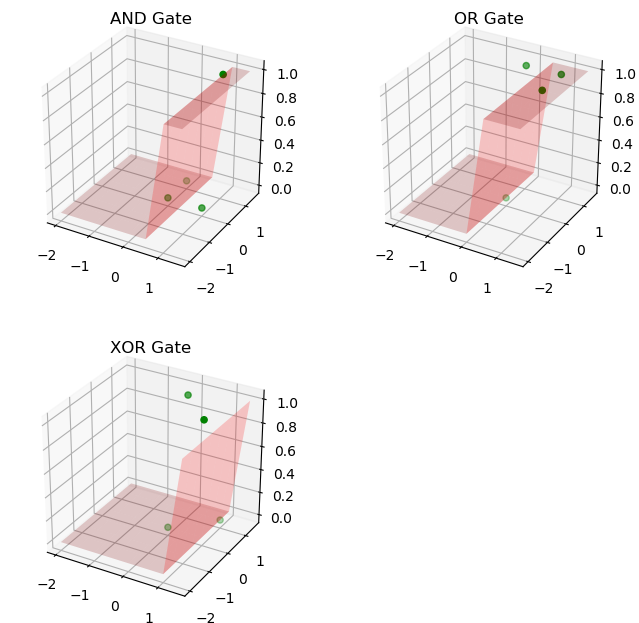

In [34]:
fig = plt.figure(figsize=(8, 8), dpi=100)
Input = [[0, 0], [0, 1], [1, 0], [1, 1]]
ax = plt.subplot(221, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], AND, s=20, c='g', label="Data points")
ax.set(facecolor="white", title="AND Gate")
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[and_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")
ax = plt.subplot(222, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], OR, s=20, c='g', label="Data points")
ax.set(facecolor="white", title="OR Gate")
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[or_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")
ax = plt.subplot(223, projection="3d")
ax.scatter(INPUT[:, 1:2], INPUT[:, 2:3], [0, 1, 1, 0], s=20, c='g')
ax.set(facecolor="white", title="XOR Gate")
X = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(X, X)
Z = np.array([[xor_gate(z, z) for z in i] for i in X])
ax.plot_surface(X, Y, Z, alpha=0.2, color="r")